# Project: Wrangling and Analyze Data - [WeRateDogs]


### Table of Contents
<ul>
<li><a href="#gathering">1. Data Gathering</a></li>
<li><a href="#assessing">2. Assessing Data</a></li>
<li><a href="#cleaning">3. Cleaning Data </a></li>
<li><a href="#storing">4. Storing Data</a></li>
<li><a href="#analyze">5. Analyzing and Visualizing Data</a></li>
</ul>


## <a id='gathering'> 1. Data Gathering</a>

In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# Use this cell to set up import statements for all of the packages that you
#plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [2]:
df_tweets = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
import requests

In [4]:
url ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv', 'wb') as f:
    f.write(response.content)

In [5]:
#read the tsv downloaded file into a dataframe
df_img = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_tweets.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [6]:
df_json = pd.read_json('tweet-json.txt', lines=True)

## <a id='assessing'>2. Assessing Data </a>
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### 2.1 Visual Assessement
In the cells below, each column of each table in this project is described. To see the table that goes hand in hand with these descriptions, display each table in its entirety by displaying the pandas DataFrame that it was gathered into. This task is the mechanical part of visual assessment in pandas.

In [7]:
df_tweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


###### df_tweets: WeRateDogs Twitter archive data columns:
<br>
<li><b> tweet_id:</b> the unique identifier for each tweet: is the last part of the tweet URL after "status/" 
<li><b>  in_reply_to_status_id:</b> if the represented Tweet is a reply to the original Tweet’s ID
<li><b>  in_reply_to_user_id:</b> if the represented Tweet is a reply to the original Tweet’s author ID
<li><b>  timestamp:</b> time when this Tweet was created
<li><b>  source:</b> utility used to post the Tweet, presented as HTML-formatted string.
<li><b>  text:</b> Tweet's text
<li><b>  retweeted_status_id:</b> if the represented Tweet is a retweet. The value is NaN if the post is original
<li><b>  retweeted_status_user_id:</b> if the represented Tweet is a retweet, this field will contain the user_id.
<li><b>  retweeted_status_timestamp:</b> time of retweet
<li><b>  expanded_urls:</b> tweet URL
<li><b>  rating_numerator:</b> numerator of the rating of a dog.
<li> rating_denominator: denominator of the rating of a dog.
<li><b>  name:</b> name of the dog
<li><b>  doggo:</b> one of the 4 life cycle stages of a dog
<li><b>  floofer:</b> one of the 4 life cycle stages of a dog
<li><b>  pupper:</b> one of the 4 life cycle stages of a dog
<li><b>  puppo:</b> one of the 4 life cycle stages of a dog

<li> As we can notice, the column Name has null values, wrong data eg: the id 2345, the dog's name is "a" which can be a typographical error
<li> There are many rows where there is no specification for the stage of the dog, please refer to the last 5 rows
    

In [8]:
df_img

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


###### df_image:  tweet image prediction data columns:
<br>
<li><b> tweet_id:</b>  the unique identifier for each tweet: is the last part of the tweet URL after "status/"
<li><b>  jpg_url:</b> the URL image
<li><b>  img_num:</b>  the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).
<li><b>  p1:</b> is the algorithm's #1 prediction for the image in the tweet
<li><b>  p1_conf:</b> is how confident the algorithm is in its #1 prediction
<li><b>  p1_dog:</b> is whether or not the #1 prediction is a breed of dog
<li><b>  p2:</b> the algorithm's second most likely prediction
<li><b>  p2_conf:</b> is how confident the algorithm is in its #2 prediction
<li><b>  p2_dog:</b> is whether or not the #2 prediction is a breed of dog
<li><b>  p3:</b> the algorithm's third most likely prediction
<li><b>  p3_conf:</b> is how confident the algorithm is in its #3 prediction
<li> <b> p3_dog:</b>: is whether or not the #3 prediction is a breed of dog.

In [9]:
df_json

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20562,False,Here we have a majestic great white breaching ...,NaN,...,0.0,NaN,NaN,NaN,3261,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,0.0,NaN,NaN,NaN,2158,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",56848,False,When you watch your owner call another dog a g...,NaN,...,0.0,NaN,NaN,NaN,16716,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28226,False,This is Zoey. She doesn't want to be one of th...,NaN,...,0.0,NaN,NaN,NaN,4429,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,NaN,...,0.0,NaN,NaN,NaN,7711,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


###### df_json: Additional data from the Twitter API. 
To facilitate our work, we will use a minimal version of twitter API data, i.e: tweet ID, retweet count, and favorite count
<br>
<li><b> tweet_id:</b> the unique identifier for each tweet: is the last part of the tweet URL after "status/" 
<li><b>  retweet_count:</b> the number of retweet
<li><b>  favorite_count:</b> the number of favorite ("like")

In [65]:
labels= ['tweet_id', 'retweet_count', 'favorite_count']
df_json_minimal = pd.DataFrame(columns = labels)

In [66]:
for i in range(len(df_json)): 
    df_json_minimal.loc[i,"tweet_id"]= df_json.loc[i,"id_str"]
    df_json_minimal.loc[i,"retweet_count"]= df_json.loc[i,"retweet_count"]
    df_json_minimal.loc[i,"favorite_count"]= df_json.loc[i,"favorite_count"]

In [67]:
df_json_minimal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null float64
retweet_count     2354 non-null float64
favorite_count    2354 non-null float64
dtypes: float64(3)
memory usage: 153.6 KB


### 2.2 Programmatic Assessement
In the cells below, we will review the different datasets using specific codes. This task is the mechanical part of programmatic assessment in pandas.

In [13]:
df_tweets.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
636,793500921481273345,NaN,NaN,2016-11-01 17:12:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fiona. She's an extremely mediocre cop...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793500921...,12,10,Fiona,None,None,None,None
1070,740359016048689152,NaN,NaN,2016-06-08 01:45:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chase. He's in a predicament. 9/10 hel...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740359016...,9,10,Chase,None,None,None,None
1151,725842289046749185,NaN,NaN,2016-04-29 00:21:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Colby. He's currently regretting all t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/725842289...,12,10,Colby,None,None,None,None
760,778383385161035776,NaN,NaN,2016-09-21 00:00:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nala. She's a future Dogue model. Won'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778383385...,13,10,Nala,None,None,None,None
2085,670804601705242624,NaN,NaN,2015-11-29 03:20:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Mason. He's a total frat boy. Pretends to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670804601...,10,10,Mason,None,None,None,None


In [14]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

wrong data type for in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id. These columns should not be float, and should be converted to int

In [15]:
type(df_tweets['doggo'][0]),type(df_tweets['floofer'][0]),type(df_tweets['pupper'][0]),type(df_tweets['puppo'][0])

(str, str, str, str)

Although the datatype for dog's stages appear to be object, further investigation shows that they are all string

In [16]:
df_tweets.expanded_urls.isnull().sum()

59

In [73]:
#explore the unique name associated to dogs
df_tweets['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

When scrolling the list, we remark that there are names that seem to be typo such as "a, O, the, an, just". These names should be later fixed

There are 59 expanded url missing in this dataset

In [17]:
# Number of records whose all dog's stages columns are None
len(df_tweets[(df_tweets.doggo == 'None') & (df_tweets.floofer == 'None') & (df_tweets.pupper == 'None') & (df_tweets.puppo == 'None')])

1976

1976 recors where no stage is indicated.

In [18]:
#You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.

#First, we will check if there is any retweet, i.e the NaN value means that the tweet is original
df_tweets.retweeted_status_id.notnull().sum()

181

181 tweets are not original and are retweeted

In [19]:
type(df_tweets['timestamp'][0]), type(df_tweets['retweeted_status_timestamp'][0])

(str, float)

Although the datatype for timestamp and retweeted_status_timestamp appears to be object, further investigation shows that retweeted_status_timestamp is a float and timestamp a string.

In [68]:
df_json_minimal.sample(5)

,tweet_id,retweet_count,favorite_count
1654,6.833580e+17,1059.0,3238.0
1954,6.736129e+17,802.0,1691.0
563,8.023239e+17,6808.0,18124.0
1484,6.931090e+17,695.0,1889.0
1692,6.812817e+17,1258.0,3520.0


In [69]:
df_json_minimal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null float64
retweet_count     2354 non-null float64
favorite_count    2354 non-null float64
dtypes: float64(3)
memory usage: 153.6 KB


In [22]:
df_json_minimal.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Quality issues
1. Missing dog's name

2. Wrong data eg: the id 2345, the dog's name is "a" which can be a typographical error. we remark that there are many typo like a, an, the

3. Wrong data type for tweet_id, retweet_count and favorite_count in df_json_min. must be integer

4. Invalid data type for timestamp and retweeted_status_timestamp

5. Duplicate data: retweet data are considered as duplicates

6. Invalid data: records where indicates two differents stages of dogs.

7. Low information within retweeted_status_id and retweeted_status, in_reply_to_status_id, in_reply_to_user_id. we drop these columns

8. Change the column's name timestamp to a more significant name: tweeted_at


### Tidiness issues
1. Each variable forms a column: Add a new column that indicates the stage of the dog instead of 4 columns
2. Drop columns referring to stages as we added a one column indicating the dog's stage
3. Drop rows that does not have matching rows from df_image
4. Merge the obtained dataset with retweet_count and favorite_count from json_df

## <a id='cleaning'>3. Cleaning Data</a>
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

### Quality issues

In [23]:
# Make copies of original pieces of data
df_tweets_clean= df_tweets.copy()
df_image=df_img.copy()
df_json_min=df_json_minimal.copy()

### Issue #1: 

#### Define: Missing data: some records has the Name column missed, as the name is not important for analysis, we can only impute these values by "unknown" value

#### Code

In [24]:
df_tweets_clean['name'].replace('None', 'unknown', inplace=True)

#### Test

In [25]:
sum(df_tweets_clean['name']=='None')

0

### Issue #2:

#### Define: Inaccurate data: many records contain a wrong name, we impute these values by "unknown"

#### Code

In [26]:
df_tweets_clean['name'].replace(['a','an','the','my'], 'unknown', inplace=True)

#### Test

In [27]:
df_tweets_clean['name'].value_counts()

unknown     816
Charlie      12
Oliver       11
Lucy         11
Cooper       11
Lola         10
Penny        10
Tucker       10
Winston       9
Bo            9
Sadie         8
Bailey        7
Toby          7
Daisy         7
Buddy         7
Scout         6
Leo           6
Milo          6
Rusty         6
Bella         6
Jax           6
Koda          6
Oscar         6
Stanley       6
Dave          6
Jack          6
George        5
very          5
Larry         5
Finn          5
           ... 
Chaz          1
Deacon        1
Snoopy        1
Remy          1
Goliath       1
Lolo          1
Stormy        1
Pherb         1
Dunkin        1
Mabel         1
Darrel        1
Maya          1
Nigel         1
Crawford      1
Griswold      1
Horace        1
Tito          1
Derby         1
Blu           1
Karma         1
Autumn        1
Mona          1
Willie        1
Blanket       1
Fido          1
Clybe         1
Arlen         1
Fillup        1
Saydee        1
Rudy          1
Name: name, Length: 953,

### Issue #3:

#### Define: change data type of tweet_id, favorite_count and retweet_count to integer

#### Code

In [28]:
df_json_min['tweet_id']=df_json_min['tweet_id'].astype(int)
df_json_min['retweet_count']=df_json_min['retweet_count'].astype(int)
df_json_min['favorite_count']=df_json_min['favorite_count'].astype(int)

#### Test

In [29]:
df_json_min.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 73.6 KB


### Issue #4:

#### Define: Invalid data type for timestamp and retweeted_status_timestamp: Convert these columns to date type

#### Code

In [30]:
df_tweets_clean['timestamp']=pd.to_datetime(df_tweets_clean['timestamp'])
df_tweets_clean['retweeted_status_timestamp']=pd.to_datetime(df_tweets_clean['retweeted_status_timestamp'])

#### Test

In [31]:
df_tweets_clean.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

### Issue #5:

#### Define: Drop duplicate data: retweet data are considered as duplicates. 

#### Code

In [32]:
#You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
#the NaN value means that the tweet is original
df_tweets_clean=df_tweets_clean[df_tweets_clean.retweeted_status_id.isnull()]

#### Test

In [33]:
df_tweets_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950...,13,10,unknown,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890729181...,13,10,unknown,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### Issue #6:

#### Define: Drop Invalid data: records where indicates more than one stage of dogs.

#### Code

In [34]:
#first looking for possible multiplications of values
df_tweets_clean[['doggo','floofer','pupper','puppo']].sum(axis=1).unique()

array(['NoneNoneNoneNone', 'doggoNoneNoneNone', 'NoneNoneNonepuppo',
       'NoneNonepupperNone', 'NoneflooferNoneNone', 'doggoNoneNonepuppo',
       'doggoflooferNoneNone', 'doggoNonepupperNone'], dtype=object)

In [35]:
# select rows where there are more than one stage
multi_stage_value=['doggoNoneNonepuppo','doggoflooferNoneNone','doggoNonepupperNone']

In [36]:
#define a column where we put the combination of stage value
df_tweets_clean['stage']=df_tweets_clean[['doggo','floofer','pupper','puppo']].sum(axis=1)

# we extract rows where we found multiple stage
for val in multi_stage_value:
    df_multi_stage=df_tweets_clean.query('stage == @val')
    #we drop wrong multi stage values
    df_tweets_clean.drop(df_multi_stage.index, axis=0, inplace=True)

#### Test

In [37]:
df_tweets_clean['stage'].value_counts()

NoneNoneNoneNone       1831
NoneNonepupperNone      224
doggoNoneNoneNone        75
NoneNoneNonepuppo        24
NoneflooferNoneNone       9
Name: stage, dtype: int64

### Issue #7:

#### Define: drop columns with low informations: retweeted_status_id, retweeted_status_user_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_timestamp . As we kept only original tweets, all these columns has low informations (Null values)

#### Code

In [38]:
df_tweets_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_timestamp'], inplace= True)

#### Test

In [39]:
df_tweets_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NoneNoneNoneNone
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NoneNoneNoneNone
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NoneNoneNoneNone
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NoneNoneNoneNone
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,NoneNoneNoneNone
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,unknown,None,None,None,None,NoneNoneNoneNone
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,NoneNoneNoneNone
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,unknown,None,None,None,None,NoneNoneNoneNone
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,NoneNoneNoneNone
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,doggoNoneNoneNone


### Issue #8:

#### Define: change the col name timestamp to more significant name: tweeted_at

#### Code

In [40]:
df_tweets_clean.rename(columns= {'timestamp':'tweeted_at'}, inplace=True)

#### Test

In [41]:
df_tweets_clean

,tweet_id,tweeted_at,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NoneNoneNoneNone
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NoneNoneNoneNone
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NoneNoneNoneNone
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NoneNoneNoneNone
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,NoneNoneNoneNone
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,unknown,None,None,None,None,NoneNoneNoneNone
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,NoneNoneNoneNone
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,unknown,None,None,None,None,NoneNoneNoneNone
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,NoneNoneNoneNone
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,doggoNoneNoneNone


### Tidiness issues

### Issue #1:

#### Define: Each variable forms a column: Add a new column that indicates the stage of the dog instead of 4 columns

#### Code

In [42]:
df_tweets_clean['stage'].unique()

array(['NoneNoneNoneNone', 'doggoNoneNoneNone', 'NoneNoneNonepuppo',
       'NoneNonepupperNone', 'NoneflooferNoneNone'], dtype=object)

In [43]:
#code inspired from connect session

def generateStage(colrow):
    if(colrow == 'doggoNoneNoneNone'):
        stage = 'doggo'
    elif(colrow == 'NoneNoneNonepuppo'):
        stage = 'puppo'
    elif(colrow == 'NoneNonepupperNone'):
        stage = 'pupper'
    elif(colrow == 'NoneflooferNoneNone'):
        stage = 'floofer'
    else:
        stage= 'None'
    return stage

In [44]:
df_tweets_clean['stage'] = df_tweets_clean['stage'].apply(lambda x: generateStage(x))

#### Test

In [45]:
df_tweets_clean['stage'].unique()

array(['None', 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

### Issue #2:

#### Define: drop doggo, puppo, pupper, floofer columns

#### Code

In [46]:
df_tweets_clean.drop(columns=['doggo', 'puppo', 'pupper', 'floofer'], inplace=True)

#### Test

In [47]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2163 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2163 non-null int64
tweeted_at            2163 non-null datetime64[ns]
source                2163 non-null object
text                  2163 non-null object
expanded_urls         2105 non-null object
rating_numerator      2163 non-null int64
rating_denominator    2163 non-null int64
name                  2163 non-null object
stage                 2163 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 169.0+ KB


### Issue #3:

#### Define: Drop rows that does not have matching rows from df_image, i.e tweet_id 

#### Code

In [48]:
df_tweets_clean_copy = pd.merge(df_tweets_clean, df_image, how='inner', on=['tweet_id'])

#### Test

In [49]:
df_tweets_clean_copy

,tweet_id,tweeted_at,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,unknown,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,unknown,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


### Issue #4:

#### Define: Merge the obtained dataset with retweet_count and favorite_count from json_df in one data

#### Code

In [50]:
all_df =pd.merge(df_tweets_clean_copy, df_json_min, how='inner', on=['tweet_id'])

#### Test

In [51]:
all_df

,tweet_id,tweeted_at,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
1,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
2,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048
3,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,unknown,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3261,20562
4,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,unknown,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,16716,56848
5,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,4429,28226
6,890006608113172480,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,...,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True,7624,31166
7,889638837579907072,2017-07-25 00:10:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Ted. He does his best. Sometimes that'...,https://twitter.com/dog_rates/status/889638837...,12,10,Ted,None,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,...,0.991650,True,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True,4735,27672
8,889278841981685760,2017-07-24 00:19:32,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. You're witnessing one of his m...,https://twitter.com/dog_rates/status/889278841...,13,10,Oliver,None,https://pbs.twimg.com/ext_tw_video_thumb/88927...,...,0.626152,True,borzoi,0.194742,True,Saluki,0.027351,True,5637,25652
9,888917238123831296,2017-07-23 00:22:39,"<a href=""http://twitter.com/download/iphone"" r...",This is Jim. He found a fren. Taught him how t...,https://twitter.com/dog_rates/status/888917238...,12,10,Jim,None,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,...,0.714719,True,Tibetan_mastiff,0.120184,True,Labrador_retriever,0.105506,True,4709,29611


In [52]:
all_df.shape

(1292, 22)

## <a id='storing'>4. Storing Data</a>
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [53]:
all_df.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## <a id='analyze'>5. Analyzing and Visualizing Data</a>
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [54]:
df=pd.read_csv('twitter_archive_master.csv')

In [55]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1.292000e+03,1292.000000,1292.000000,1292.000000,1292.000000,1.292000e+03,1.292000e+03,1292.000000,1292.000000
mean,7.323923e+17,12.855263,10.548762,1.187307,0.585942,1.375775e-01,6.158376e-02,2555.910217,8292.690402
std,6.628468e+16,51.285549,7.895715,0.541587,0.273294,1.019806e-01,5.201484e-02,3961.162528,11103.780111
min,6.660293e+17,1.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,81.000000
25%,6.747987e+17,10.000000,10.000000,1.000000,0.354627,5.470380e-02,1.664183e-02,601.750000,1750.750000
50%,7.058784e+17,11.000000,10.000000,1.000000,0.575694,1.206915e-01,4.990720e-02,1299.000000,3892.000000
75%,7.784438e+17,12.000000,10.000000,1.000000,0.836144,1.996243e-01,9.470035e-02,3082.750000,10427.250000
max,8.918152e+17,1776.000000,170.000000,4.000000,1.000000,4.676780e-01,2.710420e-01,56625.000000,107015.000000


As we can notice, algorithm p1 has the highest confidence rate (max =1 vs 4.67e-01 for p2 and 2.71e-01 for p3 ; and min =0.04 vs e-08 and e-10 for respectively p2 and p3). For this reason, we will analyse our data based on p1 related values

### Insights:
1. Does having a dog name affect the favorite count?

2. Which stage of dog is tweeted the most?

3. Does the stage of dog affect the favorite count?

### Research Question 1: Does having a dog name affect the favorite count?

In [56]:
df[df['name']!='unknown'].favorite_count.sum() > df[df['name'] =='unknown'].favorite_count.sum()

True

We notice here, that named dogs are more liked than the unknown ones. 

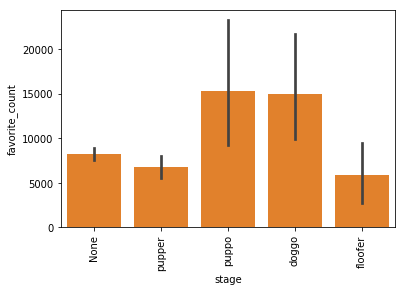

In [57]:
sns.barplot(data = df, x='stage', y='favorite_count', color = sns.color_palette()[1])
plt.xticks(rotation=90);

### Research Question 2: Which stage of dog is tweeted the most?

In [58]:
df['stage'].value_counts()

None       1096
pupper      143
doggo        34
puppo        15
floofer       4
Name: stage, dtype: int64

Unfortunately, most tweets doesn't reveal the stage of the dog, but among the ones indicating the dogs' stage, pupper stage is the most tweeted one, followeed by doggo then puppo and floofer is the lowest stage tweeted.

### Research Question 3: Does the stage of dog affect the favorite count?

In [59]:
df_stage=df.groupby(['stage'])
df_stage.favorite_count.sum().sort_values(ascending=False)

stage
None       8990052
pupper      963250
doggo       508571
puppo       228628
floofer      23655
Name: favorite_count, dtype: int64

Based on research Q2 and Q3, we notice that the favorite count is behaving following the number of tweeting, i.e, Pupper is tweeted the most and it collects the most favorite count, following by doggo then puppo and finally floofer.

### Visualization

#### Research Question 1: Does the retweet count affect the favorite_count?

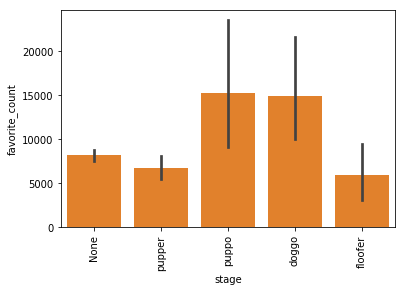

In [60]:
sns.barplot(data = df, x='stage', y='favorite_count', color = sns.color_palette()[1])
plt.xticks(rotation=90);

Visualisation communicates results better. To further justify our finding in Q3, we visualize the favorite count according to the stage of the dog.

#### Research Question 2: Which Dogs' breed is rated the most ?

In [61]:
df_breed_true=df[df['p1_dog']==True]
df_numerator= df_breed_true.groupby(['p1']).rating_numerator.sum().sort_values(ascending=False)
df_numerator

p1
golden_retriever               1205
Labrador_retriever              957
Pembroke                        733
Chihuahua                       485
pug                             407
Pomeranian                      349
chow                            249
cocker_spaniel                  246
Samoyed                         242
toy_poodle                      222
French_bulldog                  215
malamute                        181
Chesapeake_Bay_retriever        172
Eskimo_dog                      139
Siberian_husky                  132
miniature_pinscher              130
Great_Pyrenees                  129
Shih-Tzu                        127
Cardigan                        127
Rottweiler                      123
beagle                          122
German_shepherd                 118
Shetland_sheepdog               108
Pekinese                        103
Old_English_sheepdog            101
Staffordshire_bullterrier       101
vizsla                           97
borzoi                   

In [62]:
df_numerator_top=df_numerator.head(10)
df_numerator_top

p1
golden_retriever      1205
Labrador_retriever     957
Pembroke               733
Chihuahua              485
pug                    407
Pomeranian             349
chow                   249
cocker_spaniel         246
Samoyed                242
toy_poodle             222
Name: rating_numerator, dtype: int64

In [63]:
breed_ratings = df_breed_true.query('p1 == p1')[['rating_numerator', 'p1']].groupby('p1').mean()

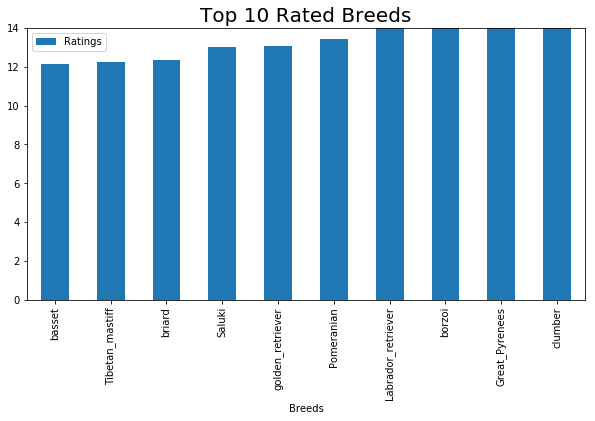

In [64]:
breed_ratings.sort_values(by=['rating_numerator'], ascending=True).tail(10).plot.bar(figsize=(10,5));
plt.ylim(top=14)
plt.title("Top 10 Rated Breeds",{'fontsize': 20})
plt.xlabel("Breeds")
plt.legend(["Ratings"])